In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [31]:
def smallerthan(df_, label, minimum):
    """
    3 Parameter: 
    mit df_ muss der Dataframe übergeben werden, ergo der des alten oder der des neuen Datensatzes
    in label muss als String der Name der Spalte eingegeben werden
    minimum als int, hier wird spezifiziert, wie viele Instanzen für die jeweilige Ausprägung vorhanden sein sollen
    
    
    Rückgabewert: gesliceten Dataframe, bei dem alle DOkumente entfernt werden, die nicht mindestens "minimum" 
    vor kommen
    """
    counts = pd.value_counts(df_[label])
    smallerthan=[]
    for instance in df_[label]:
        if counts[instance] < minimum:
            smallerthan.append('less')
        else:
            smallerthan.append(counts[instance])
    df_['enough']=smallerthan    
    df_enough = df_[df_.enough != 'less']  
    return df_enough[label]

# Alter Datensatz

In [3]:
df = pd.read_csv('../../dataset/complete_dataset.csv')
df.head()

C:\Users\janko\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,3,5,6,7,8,9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
0,6584498.xml,( Rückblick ) Waren Sie neulich mit uns in die...,tt1147427,"Comedy,Family,Romance",NaN,NaN,untokenisiert,NaN,nm0240047,nm0226201,tvEpisode,Príbeh séfova zástupce,Príbeh séfova zástupce,0.0,NaN,NaN,NaN,NaN,NaN
1,6977710.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,tt1294864,"Animation,Comedy",NaN,NaN,untokenisiert,NaN,NaN,"nm0509769,nm0537542,nm0875635",tvEpisode,The Case of Allie's Really Very Bad Singing,The Case of Allie's Really Very Bad Singing,0.0,NaN,NaN,22,NaN,NaN
2,6977710.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,tt1294864,"Animation,Comedy",NaN,NaN,untokenisiert,NaN,NaN,"nm0509769,nm0537542,nm0875635",tvEpisode,The Case of Allie's Really Very Bad Singing,The Case of Allie's Really Very Bad Singing,0.0,NaN,NaN,22,NaN,NaN
3,6977706.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,tt1294865,"Animation,Comedy",NaN,NaN,untokenisiert,NaN,NaN,"nm0537542,nm0875635",tvEpisode,"The Case of the Impolite, Snarly Thing","The Case of the Impolite, Snarly Thing",0.0,NaN,NaN,22,NaN,NaN
4,6979067.xml,FÜNF FREUNDE - FÜR ALLE FÄLLE FÜNF FREUNDE - F...,tt1328700,"Animation,Comedy",NaN,NaN,untokenisiert,NaN,NaN,"nm0247695,nm0537542,nm0875635",tvEpisode,The Case of the Felon with Frosty Fingers,The Case of the Felon with Frosty Fingers,0.0,NaN,NaN,22,NaN,NaN


In [4]:
df.dropna(subset=['text', 'year', 'genre', 'production_region'], inplace=True)

## Alter Datensatz Plot nach Jahr

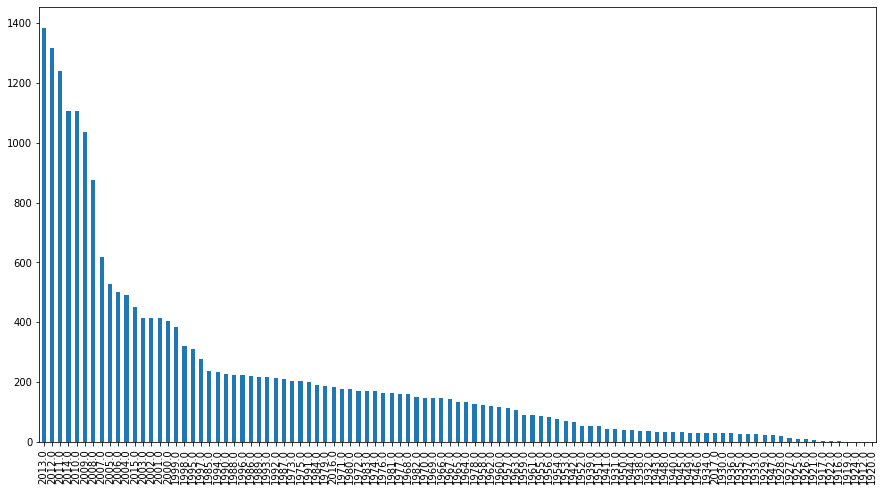

In [5]:
plt.figure(figsize=(15,8))
pd.value_counts(df['year']).plot.bar()

## Alter Datensatz Plot nach Genre

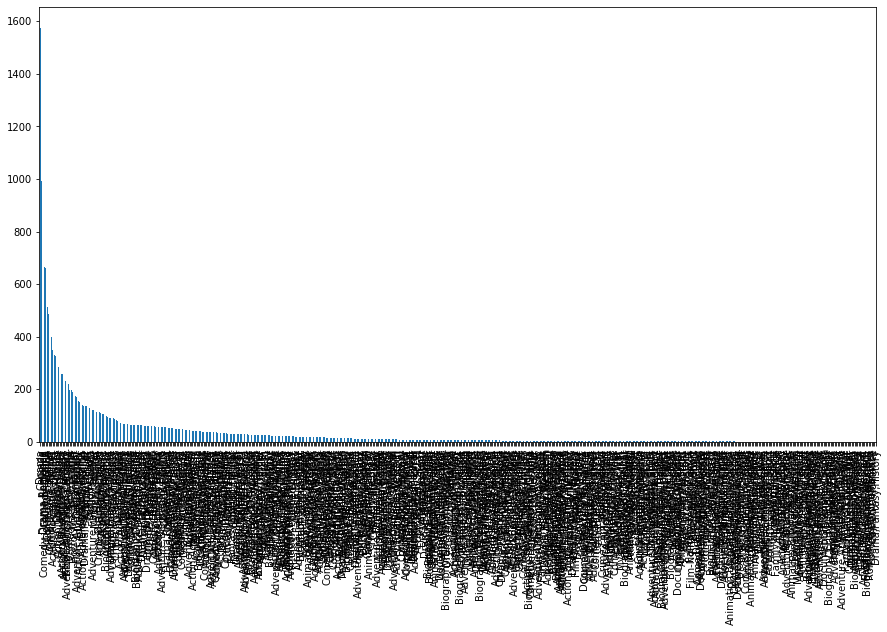

In [6]:
plt.figure(figsize=(15,8))
pd.value_counts(df['genre']).plot.bar()

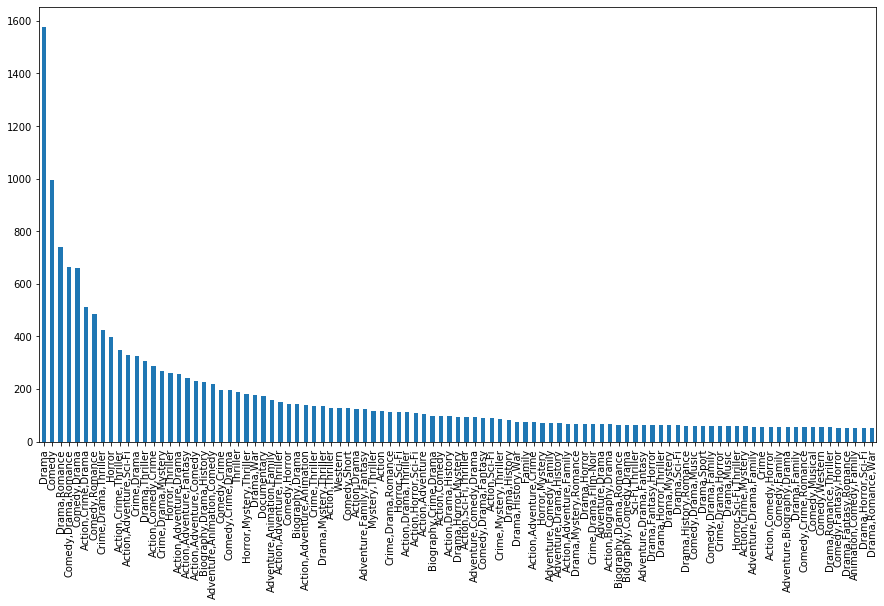

In [25]:
plt.figure(figsize=(15,8))
pd.value_counts(smallerthan(df, 'genre', 50)).plot.bar()

## Alter Datensatz Plot nach Production_region

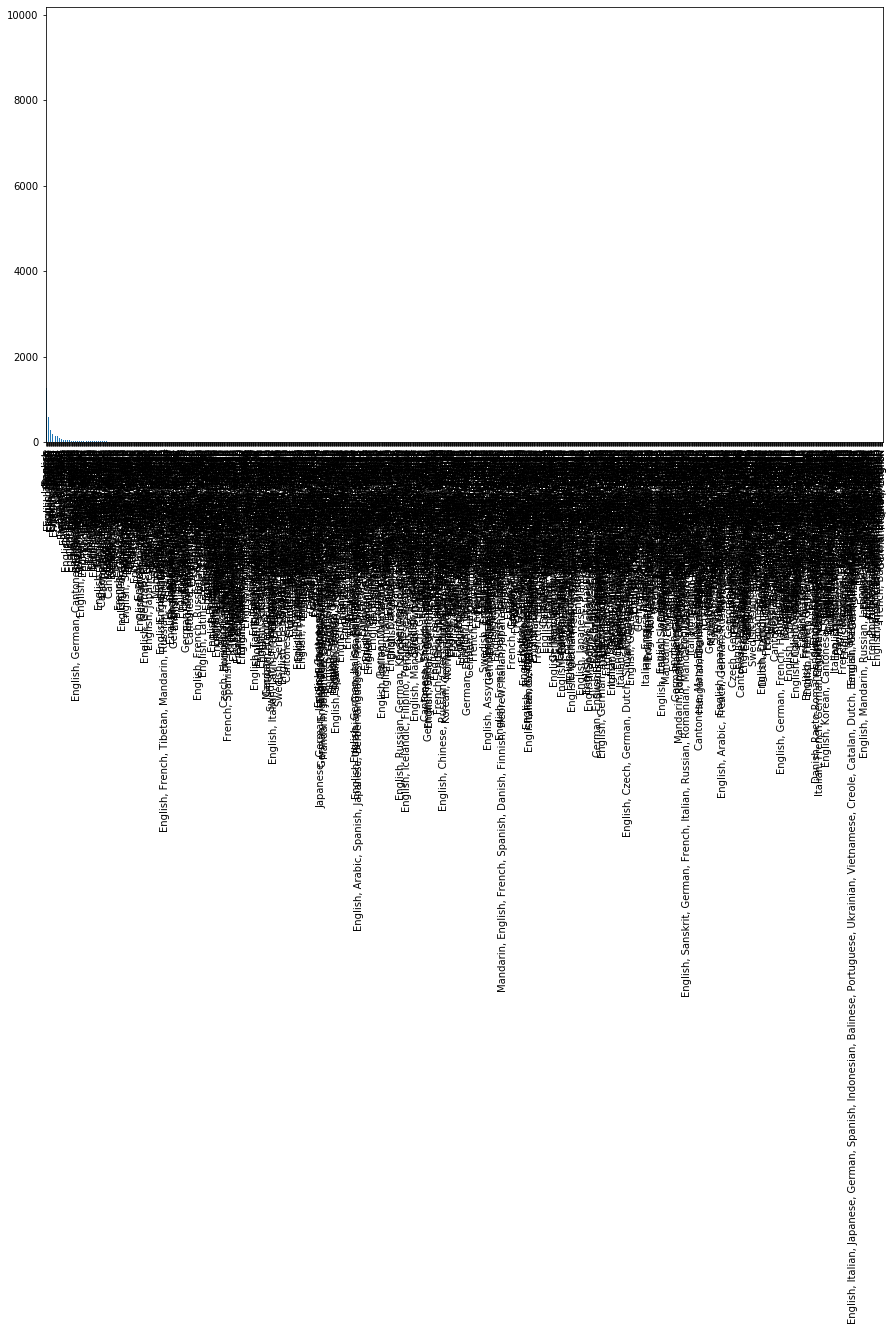

In [8]:
plt.figure(figsize=(15,8))
pd.value_counts(df['production_region']).plot.bar()

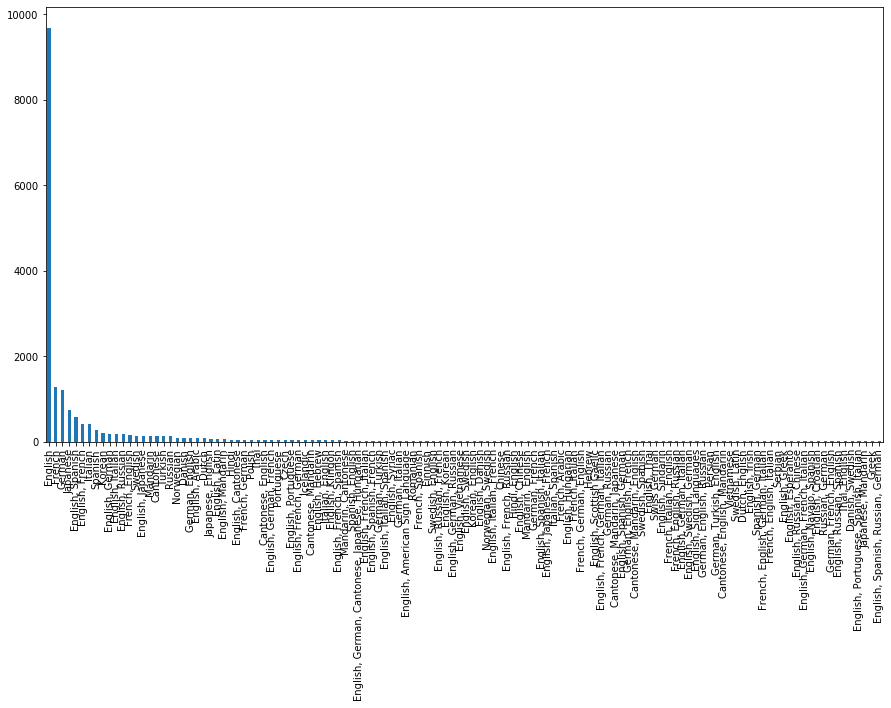

In [21]:
plt.figure(figsize=(15,8))
pd.value_counts(smallerthan(df, 'production_region', 10)).plot.bar()

## Alter Datensatz Plot nach titleType

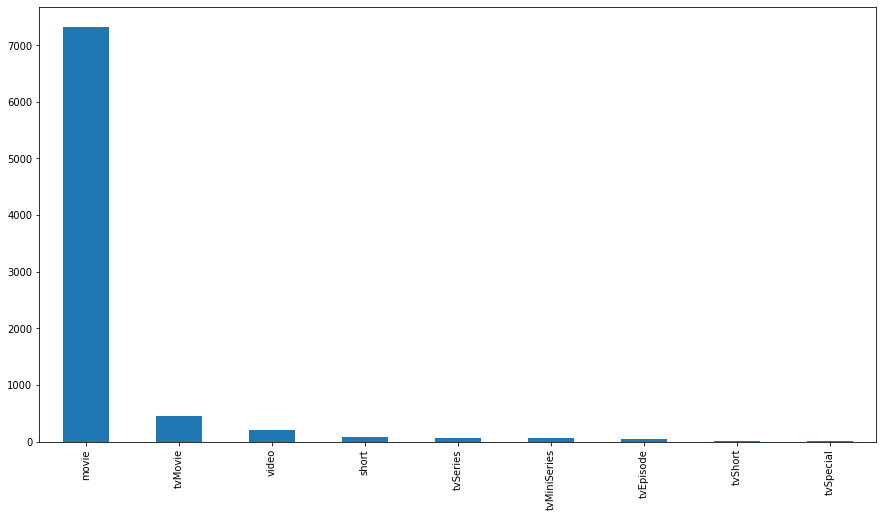

In [10]:
plt.figure(figsize=(15,8))
pd.value_counts(df['titleType']).plot.bar()

# Neuer Datensatz

In [11]:
dfn = pd.read_csv('../../dataset/movies_complete.csv')
dfn.dropna(subset=['genre'], inplace=True)
dfn.dropna(subset=['Language'], inplace=True)
dfn['text_length'] = dfn.text.apply(lambda x: len(x.split()))
dfn = dfn[dfn['text_length'] >= 3000]

## Plot nach Jahr

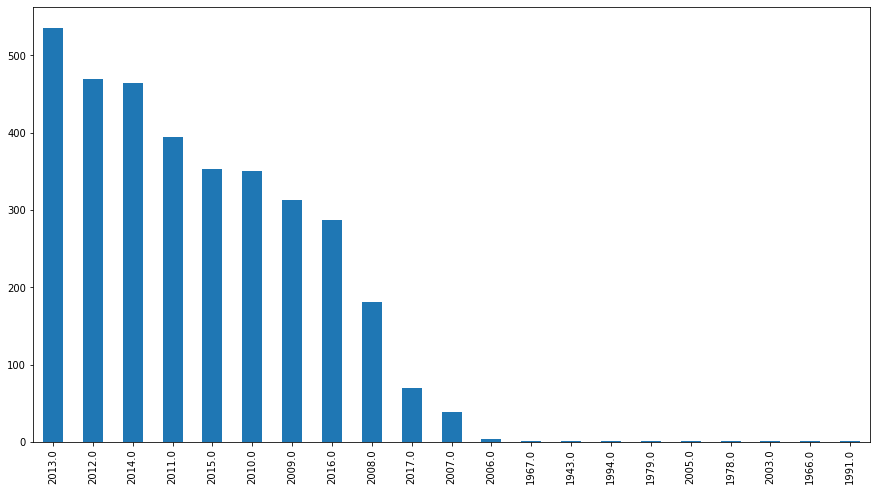

In [12]:
plt.figure(figsize=(15,8))
pd.value_counts(dfn['year']).plot.bar()

## Plot nach Genre

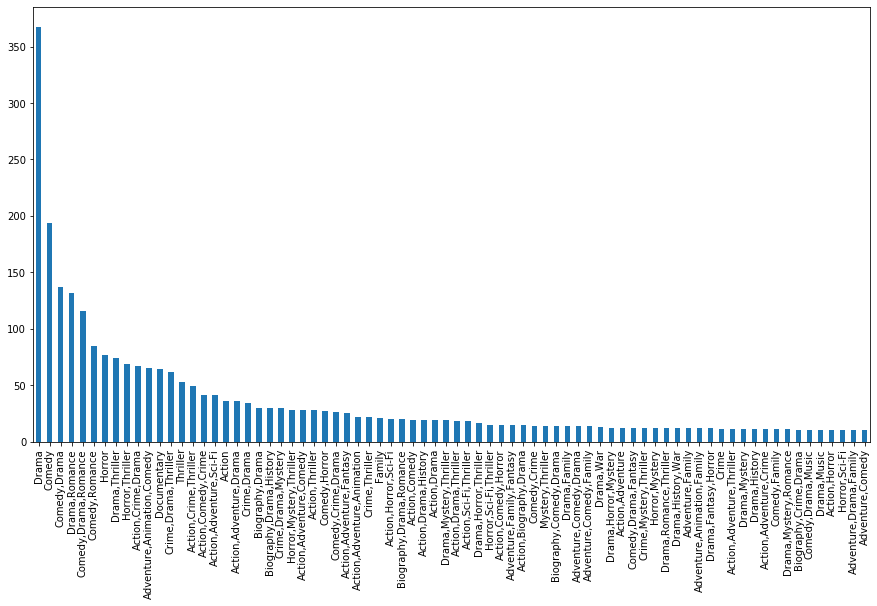

In [28]:
plt.figure(figsize=(15,8))
pd.value_counts(smallerthan(dfn, 'genre', 10)).plot.bar()

## Plot nach Language

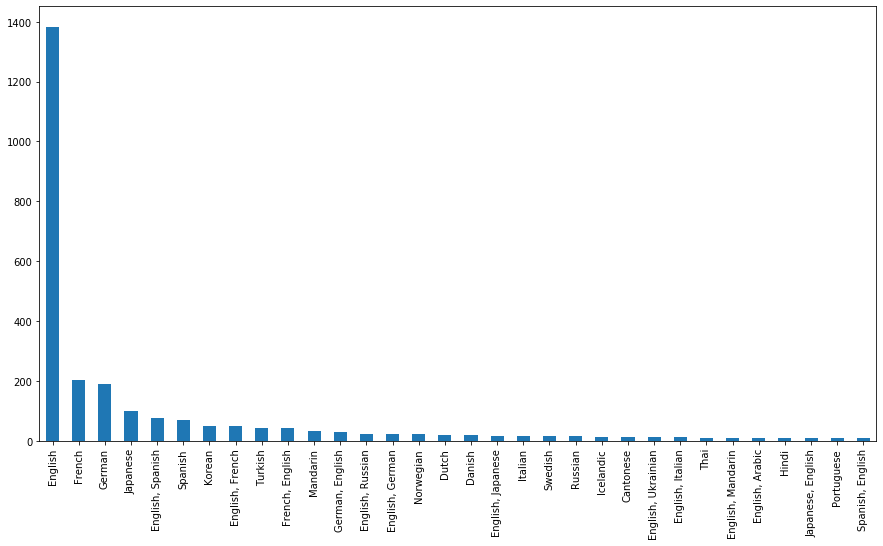

In [30]:
plt.figure(figsize=(15,8))
pd.value_counts(smallerthan(dfn, 'Language', 10)).plot.bar()